Matplotlib is building the font cache; this may take a moment.


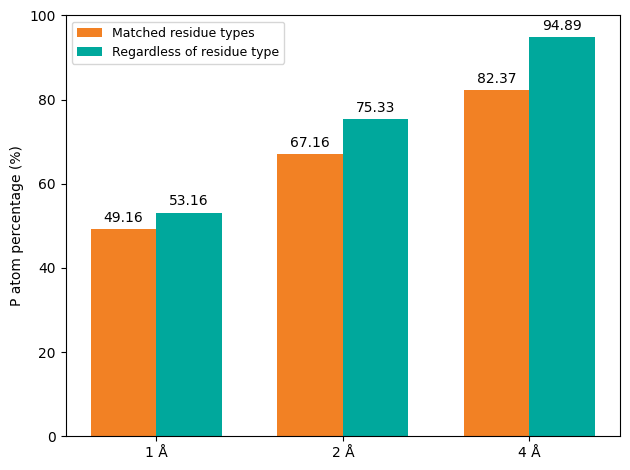

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['1 Å', '2 Å', '4 Å']
orange_values = [49.16, 67.16, 82.37]
cyan_values = [53.16, 75.33, 94.89]

x = np.arange(len(categories))  # 横坐标位置
width = 0.35  # 柱状图的宽度

# 创建图表
fig, ax = plt.subplots()

# 绘制柱状图
bars1 = ax.bar(x - width/2, orange_values, width, label='Matched residue types', color='#F28124')  # 橙色柱
bars2 = ax.bar(x + width/2, cyan_values, width, label='Regardless of residue type', color='#00A89C')  # 青色柱

# 添加标签和标题
ax.set_ylabel('P atom percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)

# 添加图例
ax.legend(loc='upper left', fontsize=9)

# 显示数值标签
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# 调整图像布局
plt.tight_layout()

# 显示图表
plt.show()

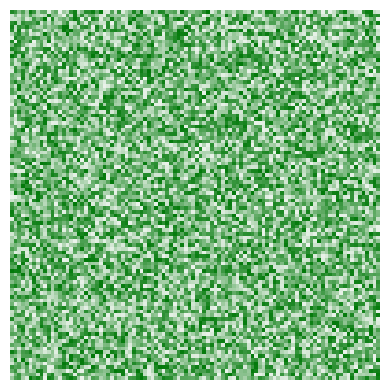

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#热图绘制,自定义颜色区间调节
#自定义值的范围
#这个白边暂时没法代码去除，不过突然发现生成的图片里没有白边

pair_data = np.random.rand(100,100)  #数据在这里准备

plt.figure(figsize=(4, 4))

cmap = sns.light_palette("#017909", as_cmap=True, input="hex", n_colors=256)
cmap.set_under('#EBF3EB')  # 设置非常淡的绿色为渐变的起点

sns.heatmap( pair_data ,cmap=cmap, linewidths=0, vmin=0, vmax=1, 
        xticklabels=False, yticklabels=False, cbar=False)  #标签不显示

#ax.axis('off')

plt.tight_layout()

#plt.savefig('pic/pairwise_pred.png', bbox_inches='tight', pad_inches=0.0, dpi=300 ) #保存图片,pad可以控制白边
plt.show()

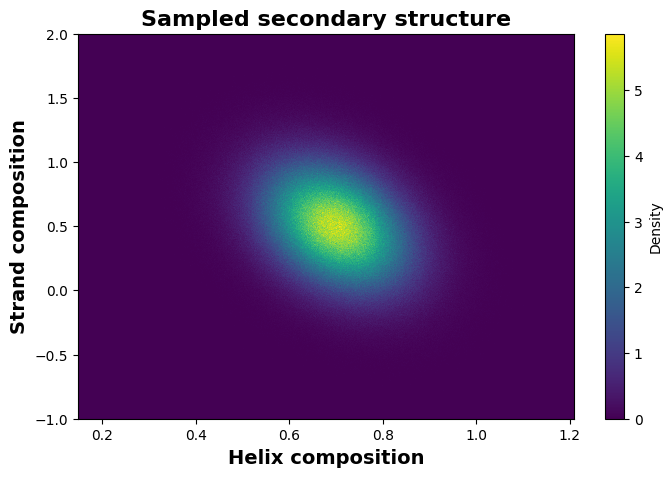

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 模拟数据
np.random.seed(0)
helix = np.random.normal(loc=0.7, scale=0.1, size=10000000)  # 模拟螺旋部分
strand = 1.2 - helix + np.random.normal(loc=0, scale=0.3, size=10000000)  # 模拟链部分

# 数据限制在0-1之间
helix = np.clip(helix, -1, 2)
strand = np.clip(strand, -1, 2)

# 绘制图像
plt.figure(figsize=(8, 5))
plt.hist2d(helix, strand, bins=500, cmap='viridis', density=True)

plt.colorbar(label='Density')
plt.xlabel('Helix composition', fontsize=14, fontweight='bold')
plt.ylabel('Strand composition', fontsize=14, fontweight='bold')
plt.title('Sampled secondary structure', fontsize=16, fontweight='bold')

plt.show()

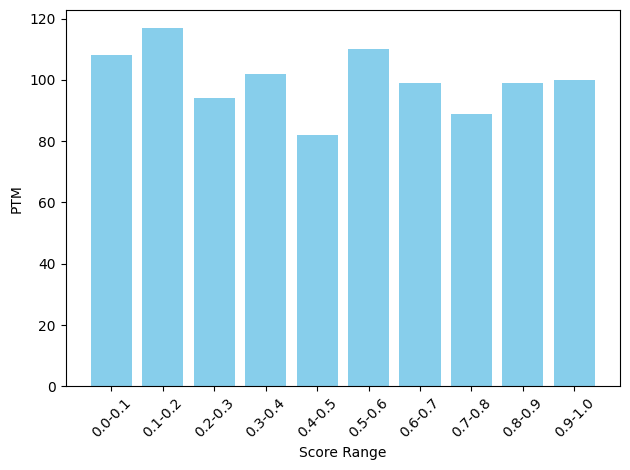

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def score_distribution(scores, min_value=0, max_value=1, num_bins=10, 
                       show_below_min=False, show_above_max=False, 
                       x_label='Score Range', y_label='PTM', 
                       decimal_places=1):  #最后是横坐标小数点显示位数
    scores = np.array(scores)
    below_min_count = np.sum(scores < min_value)
    above_max_count = np.sum(scores > max_value)
    scores = np.clip(scores, min_value, max_value)
    
    hist, bin_edges = np.histogram(scores, bins=np.linspace(min_value, max_value, num_bins + 1))
    
    counts = [below_min_count] if show_below_min else []
    counts.extend(hist.tolist())
    if show_above_max:
        counts.append(above_max_count)

    x_ticks = []
    if show_below_min:
        x_ticks.append(f'< {min_value}')
    x_ticks += [f'{bin_edges[i]:.{decimal_places}f}-{bin_edges[i+1]:.{decimal_places}f}' for i in range(num_bins)]
    if show_above_max:
        x_ticks.append(f'> {max_value}')

    plt.bar(range(len(counts)), counts, color='skyblue')
    plt.xticks(range(len(x_ticks)), x_ticks, rotation=45)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()

# 随机生成一些分数数据，范围在 0 到 1 之间
np.random.seed(42)  # 设置随机种子以确保结果可复现
random_scores = np.random.rand(1000)  # 生成 1000 个随机分数

# 绘制分数分布图
score_distribution(random_scores)

/var/folders/tj/bl7g2_w515z5wtpnmfm46sn00000gp/T/ipykernel_65584/4224214101.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Method', y='Decoy rank score', data=df, palette="Pastel1", showfliers=False)
/var/folders/tj/bl7g2_w515z5wtpnmfm46sn00000gp/T/ipykernel_65584/4224214101.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick)}%' for tick in ax.get_yticks()])


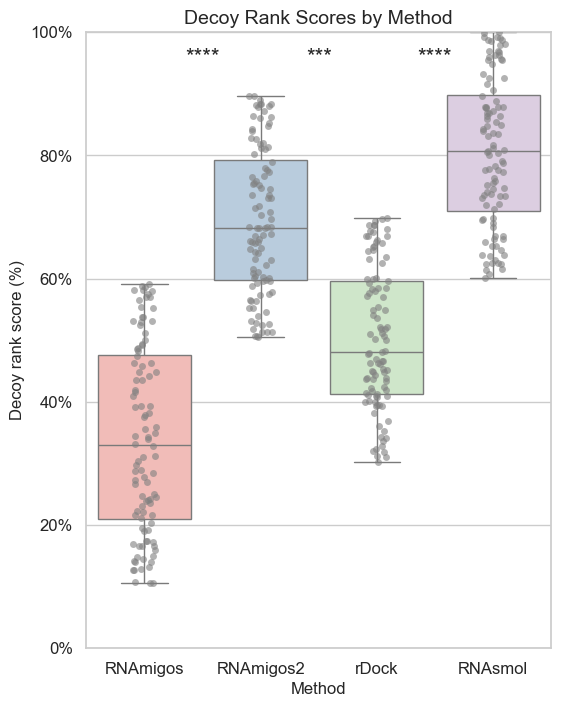

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 示例数据生成
data = {
    'Method': ['RNAmigos']*100 + ['RNAmigos2']*100 + ['rDock']*100 + ['RNAsmol']*100,
    'Decoy rank score': np.concatenate([np.random.uniform(10, 60, 100),
                                        np.random.uniform(50, 90, 100),
                                        np.random.uniform(30, 70, 100),
                                        np.random.uniform(60, 100, 100)])
}

df = pd.DataFrame(data)

# 设置绘图风格
plt.figure(figsize=(6, 8))
sns.set(style="whitegrid")

# 绘制箱型图和散点图
ax = sns.boxplot(x='Method', y='Decoy rank score', data=df, palette="Pastel1", showfliers=False)
sns.stripplot(x='Method', y='Decoy rank score', data=df, color='gray', jitter=True, alpha=0.6)

# 设置 y 轴为百分比
ax.set_ylabel('Decoy rank score (%)', fontsize=12)
ax.set_ylim(0, 100)

# 调整y轴标签为百分号格式
ax.set_yticklabels([f'{int(tick)}%' for tick in ax.get_yticks()])

# 添加星号表示统计显著性，并调整字体大小
ax.text(0.5, 95, "****", ha='center', fontsize=16)
ax.text(1.5, 95, "***", ha='center', fontsize=16)
ax.text(2.5, 95, "****", ha='center', fontsize=16)

# 设置图表标题和其他字体大小
ax.set_title('Decoy Rank Scores by Method', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

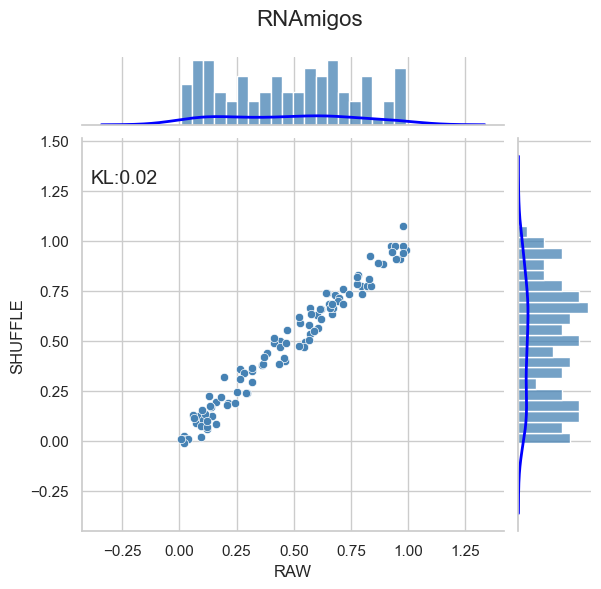

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 示例数据生成
np.random.seed(0)
raw = np.random.rand(100)
shuffle = raw + np.random.normal(0, 0.05, 100)  # 加入一些噪声

df = pd.DataFrame({'RAW': raw, 'SHUFFLE': shuffle})

# 创建散点密度图，带有曲线的边际图
g = sns.jointplot(x='RAW', y='SHUFFLE', data=df, kind="scatter", color="steelblue", marginal_kws=dict(bins=20, fill=True))

# 绘制直方图曲线
sns.kdeplot(x=raw, ax=g.ax_marg_x, color='blue', lw=2)
sns.kdeplot(y=shuffle, ax=g.ax_marg_y, color='blue', lw=2)

# 设置KL散度文本的位置和字体
kl_divergence = 0.02
g.ax_joint.text(0.1, 0.9, f'KL:{kl_divergence}', ha='center', va='center', transform=g.ax_joint.transAxes, fontsize=14)

# 设置总图的标题
plt.subplots_adjust(top=0.9)
g.fig.suptitle("RNAmigos", fontsize=16)

plt.show()